In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

from mar_designs import tidy_axes

In [2]:
# Configs and globals for notebook
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 500)

facecolor = "#F7F5F2"
figsize=(11,6)
subplotFigsize=(28,6)
titlesize=16
labelsize=14
matrixsize=(7,7)

In [3]:
# Save or read in data
# Use module 3 data for this assignment, as well
dataPath = "../data/module3_data/cleaned_labeled_data.csv"

df = pd.read_csv(dataPath, index_col=0)

df.head(3)

,FIELD_GOAL_MADE,FIELD_GOAL_MISSED,FREE_THROW,REBOUND,TURNOVER,...,TURNOVER_DIFF,FOUL_DIFF,TEAM_NAME,GAME_ID,WL
0,18,40,6,24,4,...,-5,8,Warriors,22300062,L
1,22,23,15,33,9,...,5,-8,Suns,22300062,W
2,22,27,6,24,5,...,0,9,Lakers,22300061,L


In [35]:
# Break dataframe into data and labels. Drop the game ID.
data = df[[col for col in df.keys() if "DIFF" in col]] #df.drop(columns=["TEAM_NAME", "GAME_ID", "WL"])
labels = df["WL"]
data.head(3)

,FIELD_GOAL_MADE_DIFF,FIELD_GOAL_MISSED_DIFF,FREE_THROW_DIFF,REBOUND_DIFF,TURNOVER_DIFF,FOUL_DIFF
0,-4,17,-9,-9,-5,8
1,4,-17,9,9,5,-8
2,-2,3,-5,0,0,9


In [36]:
# Create standard scalar and PCA objects
sc = StandardScaler()
pca = PCA(n_components=2)

In [37]:
# Normalize the data, apply PCA transform
data_norm = sc.fit_transform(data)
data_pca = pca.fit_transform(data_norm)

# Get arrays for each component
x1 = data_pca[:,0]
x2 = data_pca[:,1]

df_pca = pd.DataFrame(data_pca, columns=["PC1", "PC2"])
df_pca["Label"] = labels
df_pca.head()

,PC1,PC2,Label
0,3.934393,-0.803684,L
1,-3.934393,0.803684,W
2,2.292200,1.027060,L
3,-2.292200,-1.027060,W
4,-2.601285,-1.419756,L


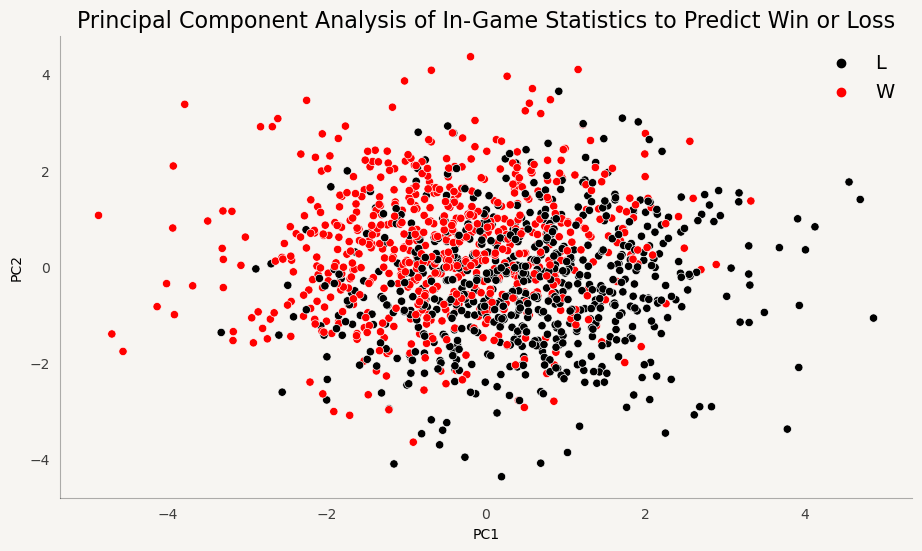

In [96]:
fig, ax = plt.subplots(figsize=figsize)

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Label', palette={'W': 'red', 'L': 'black'})

ax.set_title("Principal Component Analysis of In-Game Statistics to Predict Win or Loss", fontsize=titlesize)
tidy_axes(ax)
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)
plt.savefig("../images/module4_images/scatterplot.png")
plt.show()

In [38]:
# Break data into training and testing
X_train, X_test, y_train, y_test = train_test_split(data_pca, labels, train_size=0.8, random_state=9431)

In [45]:
df_pca.drop(["Label"], axis=1)

,PC1,PC2
0,3.934393,-0.803684
1,-3.934393,0.803684
2,2.292200,1.027060
3,-2.292200,-1.027060
4,-2.601285,-1.419756
...,...,...
1379,0.762658,-0.190828
1380,0.420156,0.269850
1381,-0.420156,-0.269850
1382,-0.544159,-3.395111


In [48]:
pd.DataFrame(X_test, columns=df_pca.drop(["Label"], axis=1).keys()).head()

,PC1,PC2
0,-0.755810,-0.677019
1,-0.852349,-0.222659
2,0.017656,0.820695
3,0.141918,0.498587
4,-3.174036,-1.347671


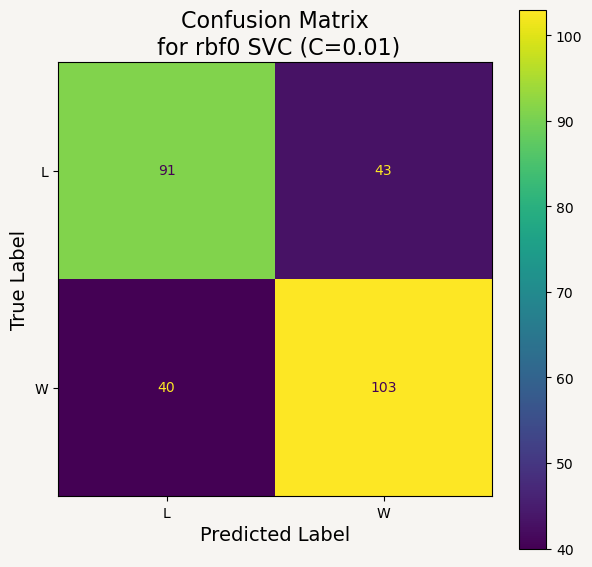

c: 0.01
Accuracy is: 0.700
Error rate is 0.300


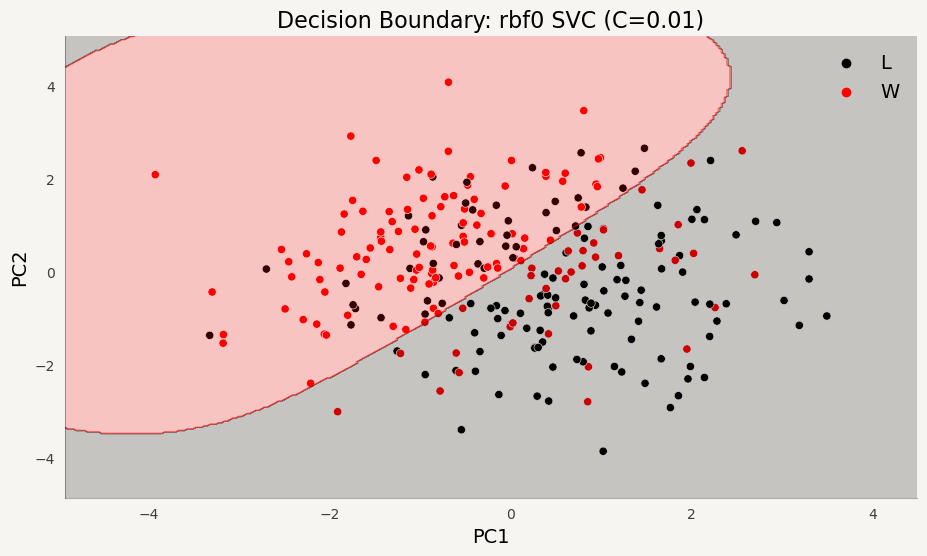

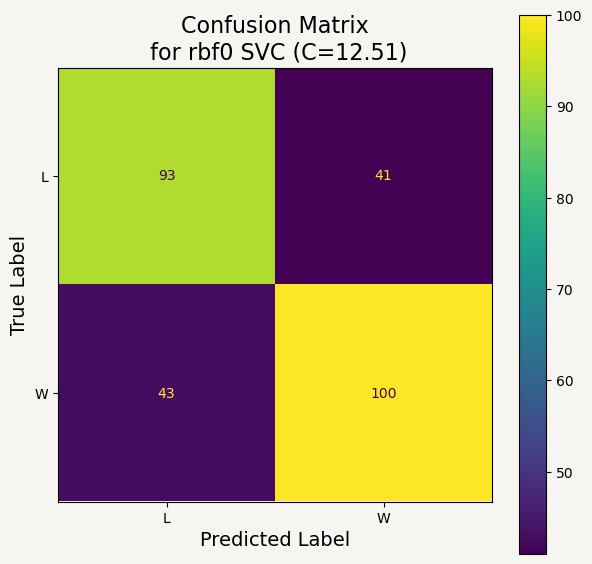

c: 12.51
Accuracy is: 0.697
Error rate is 0.303


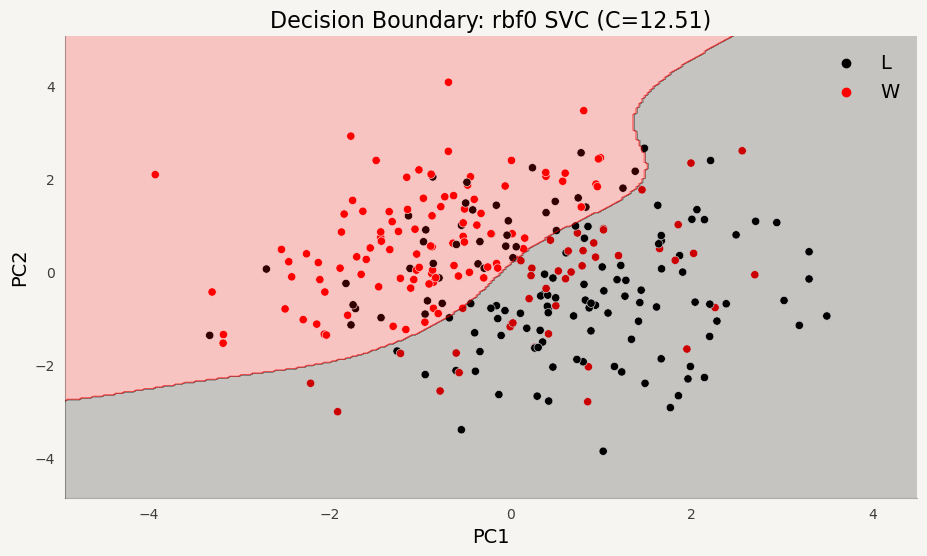

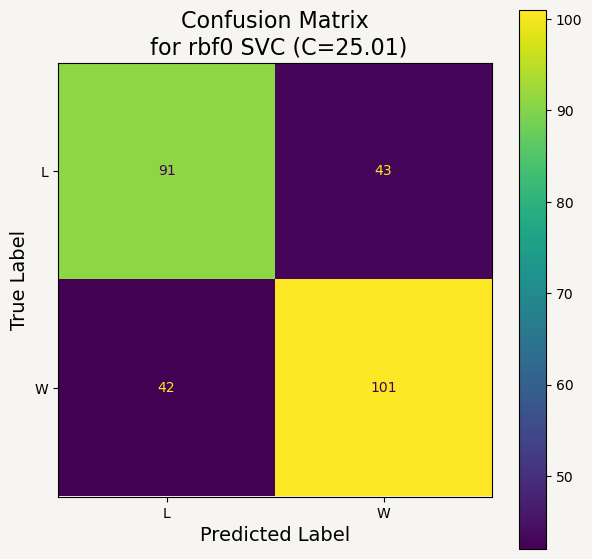

c: 25.01
Accuracy is: 0.693
Error rate is 0.307


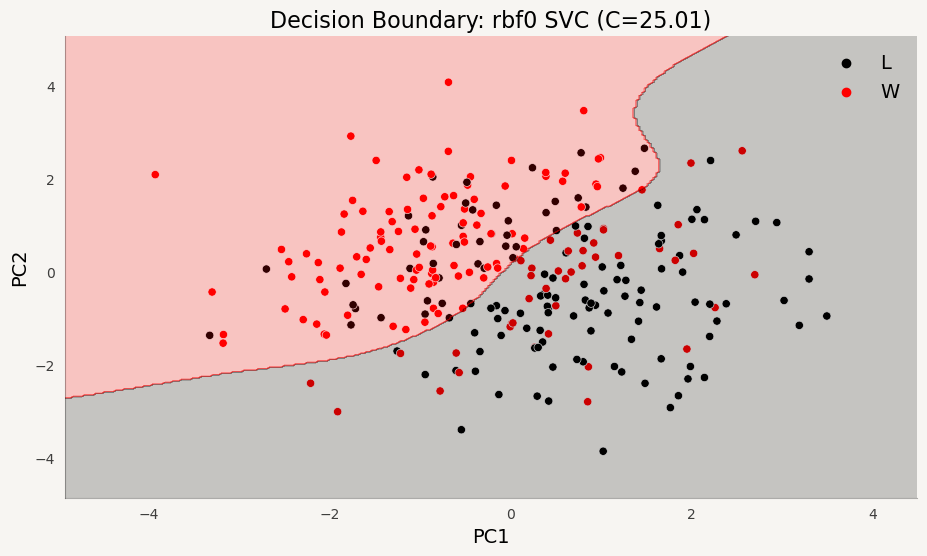

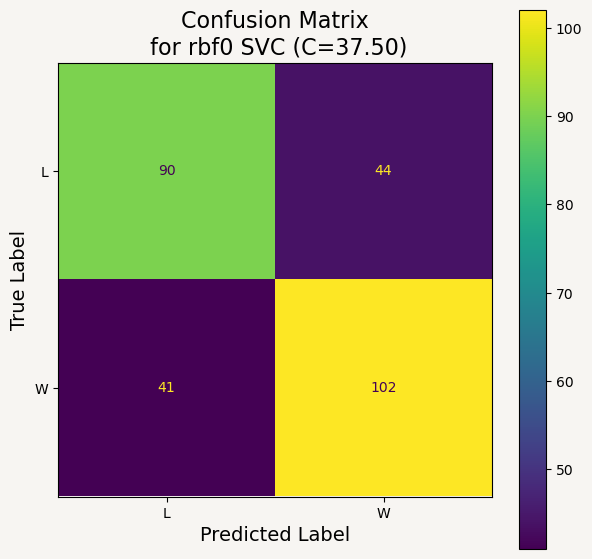

c: 37.50
Accuracy is: 0.693
Error rate is 0.307


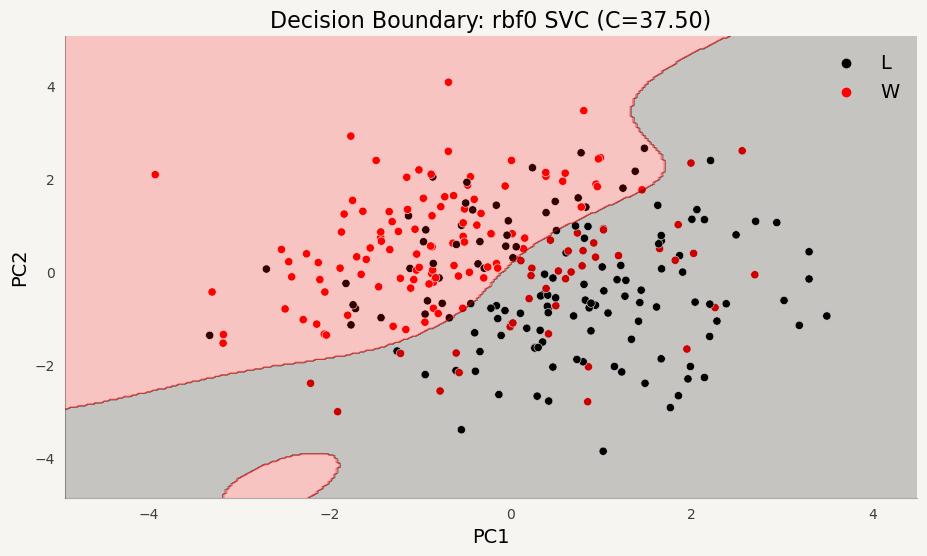

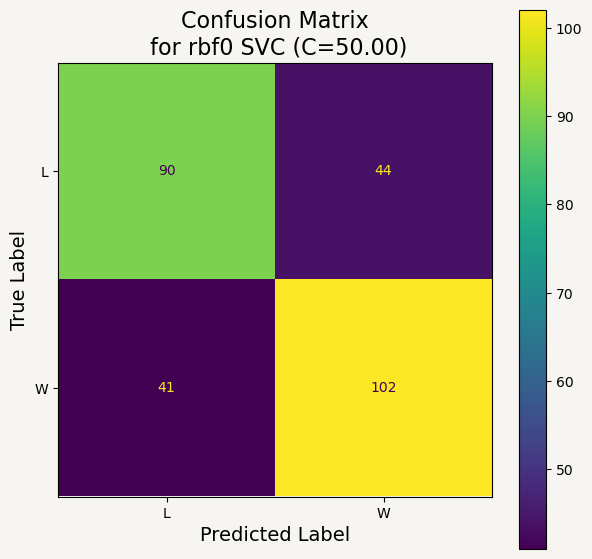

c: 50.00
Accuracy is: 0.693
Error rate is 0.307


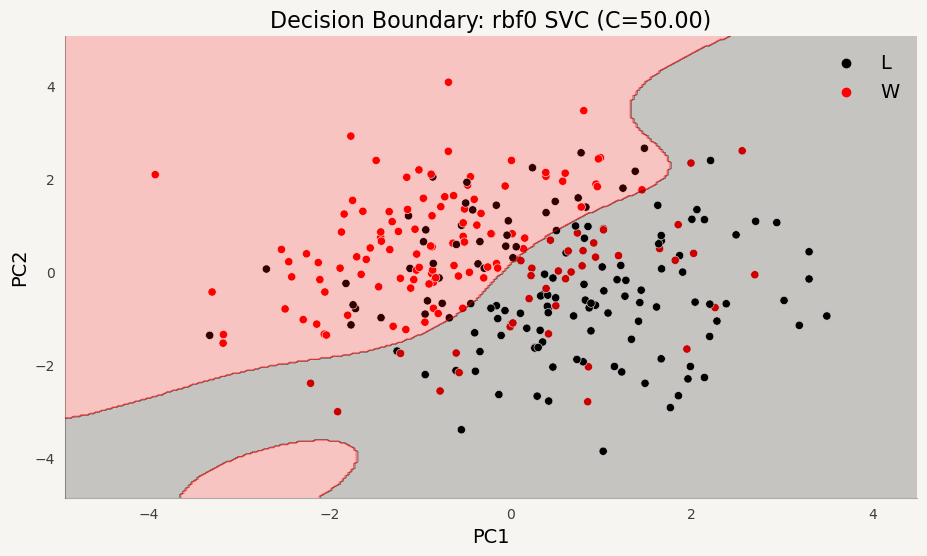

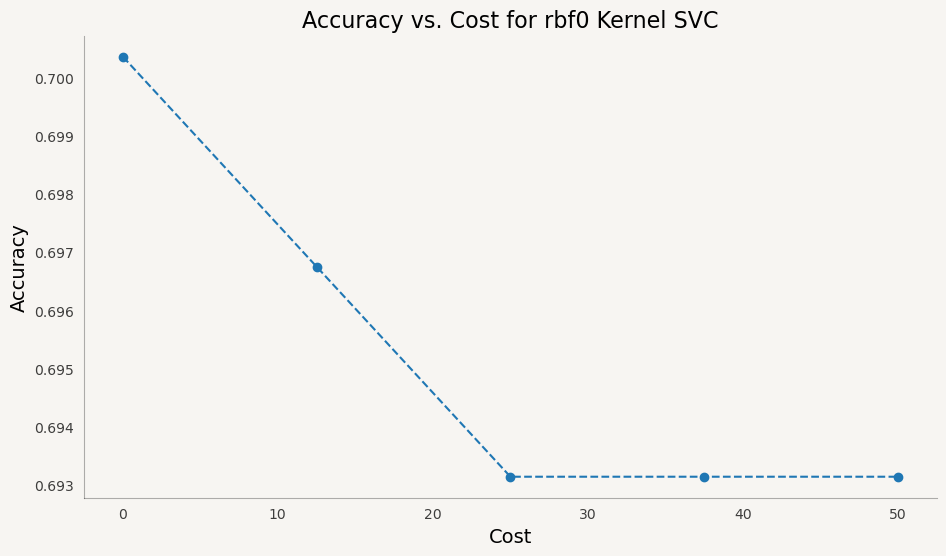

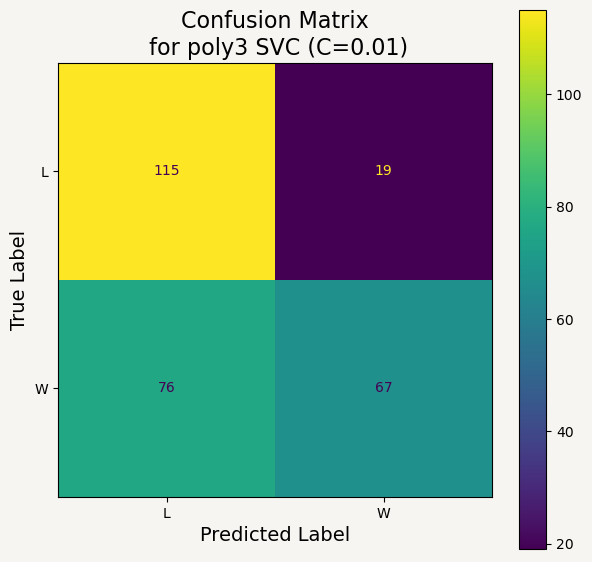

c: 0.01
Accuracy is: 0.657
Error rate is 0.343


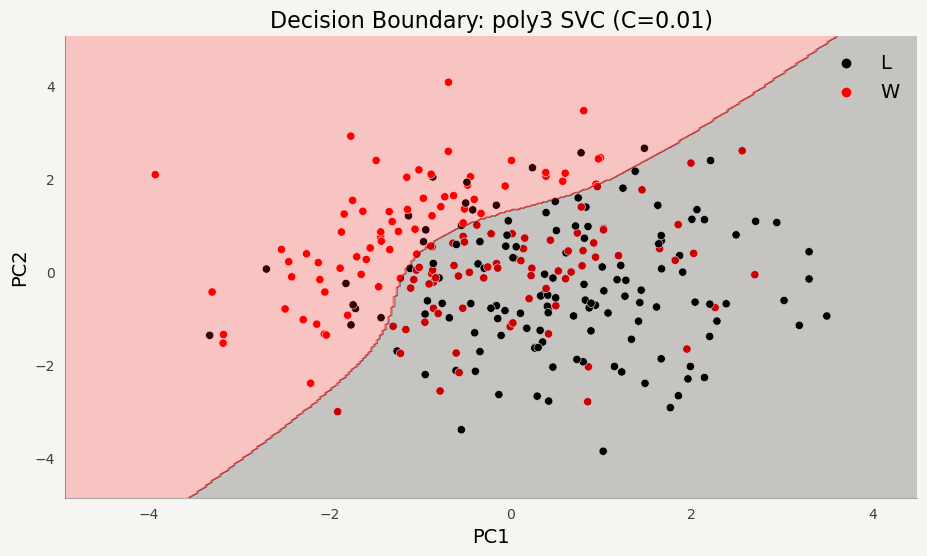

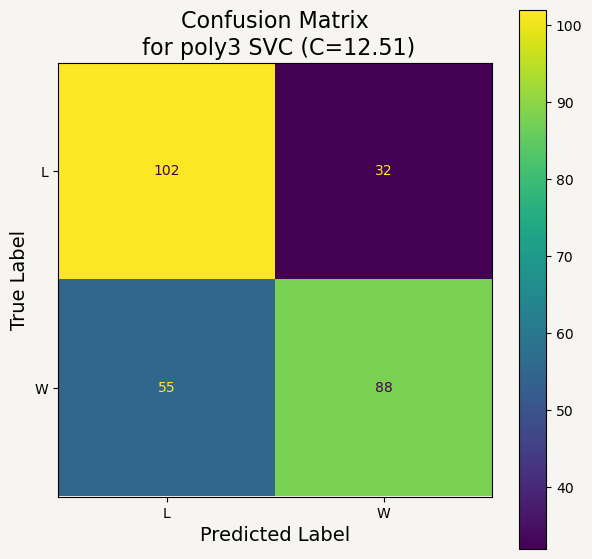

c: 12.51
Accuracy is: 0.686
Error rate is 0.314


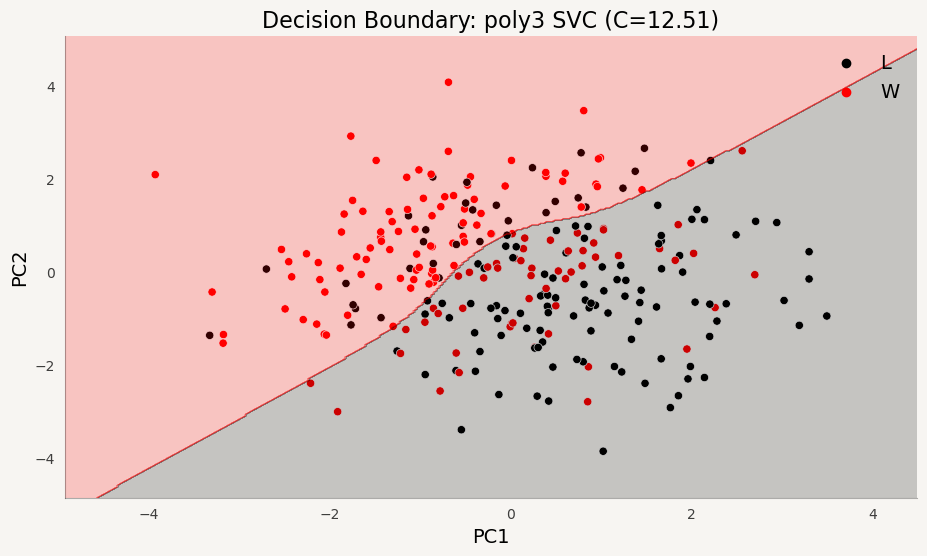

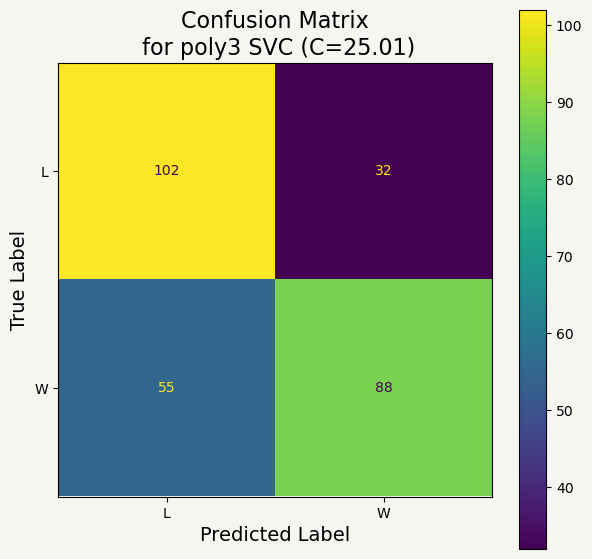

c: 25.01
Accuracy is: 0.686
Error rate is 0.314


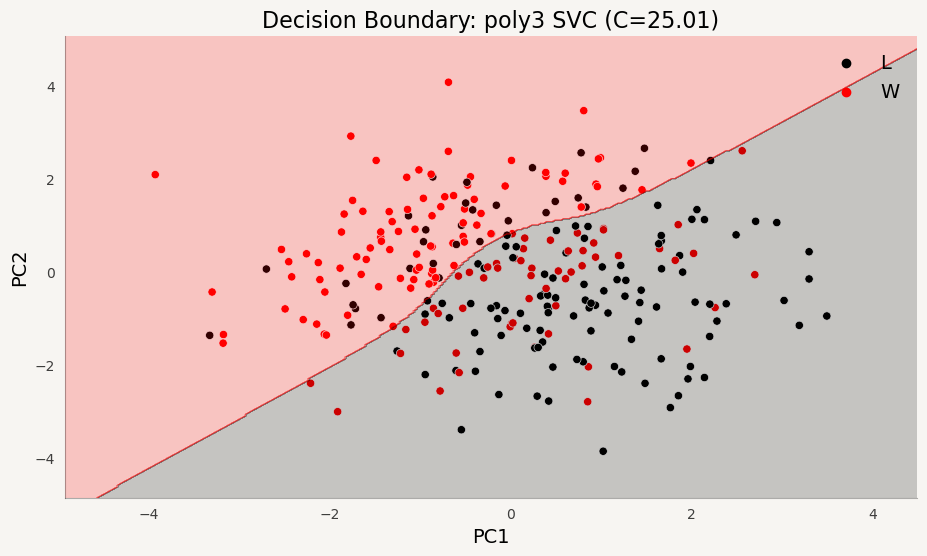

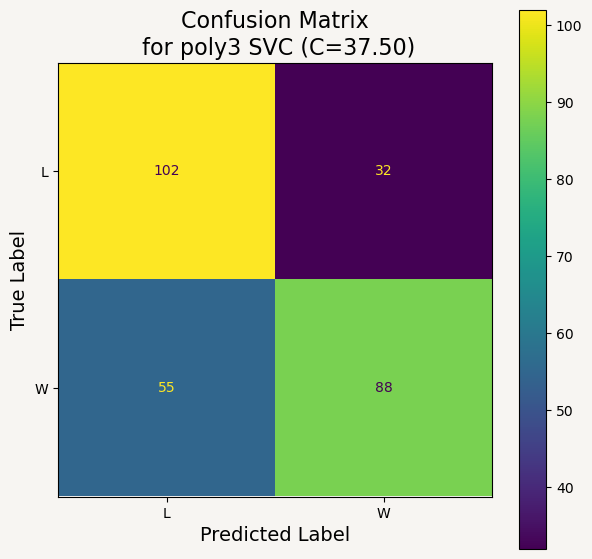

c: 37.50
Accuracy is: 0.686
Error rate is 0.314


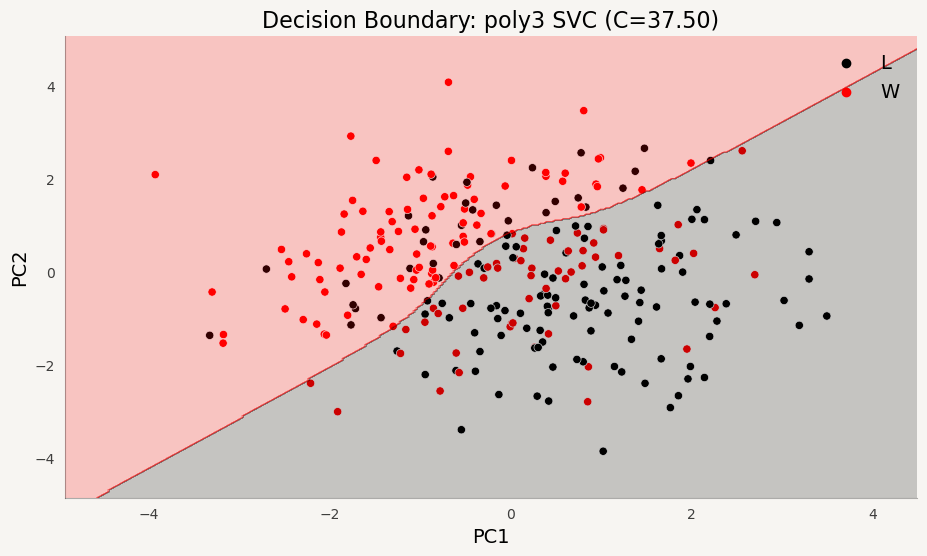

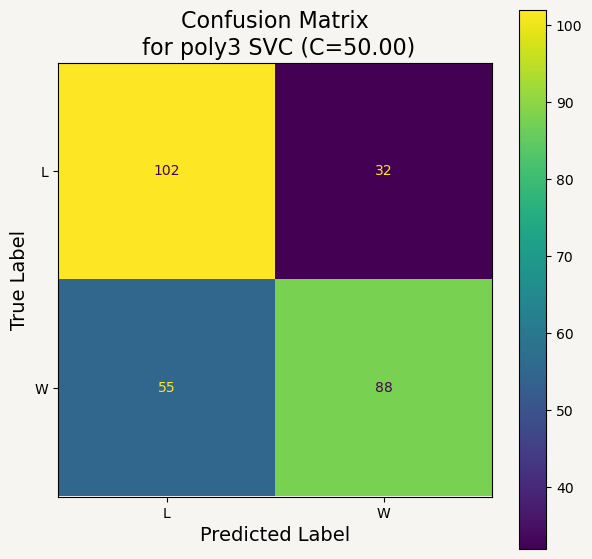

c: 50.00
Accuracy is: 0.686
Error rate is 0.314


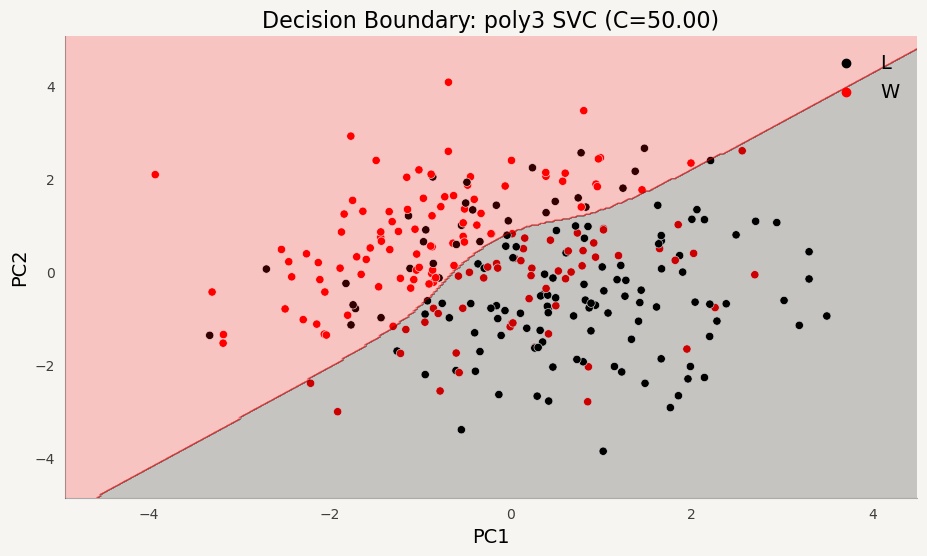

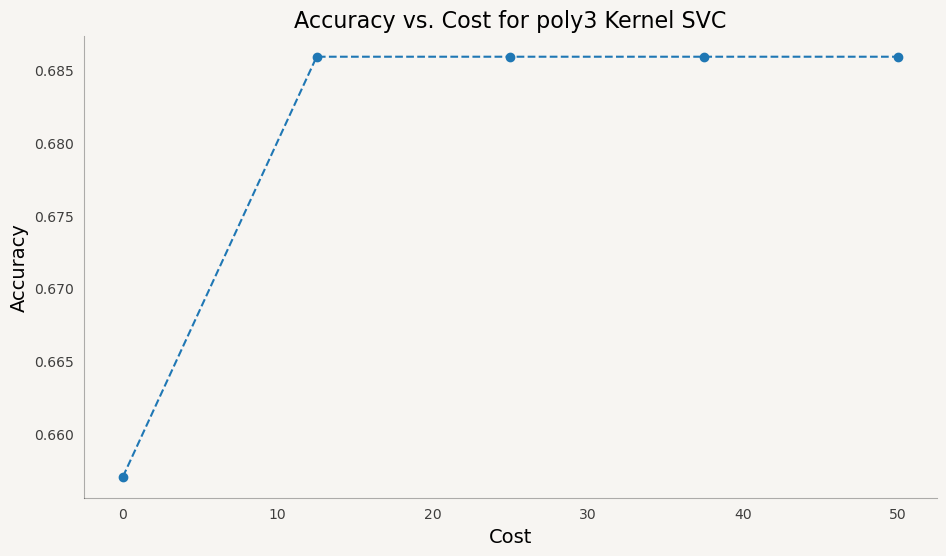

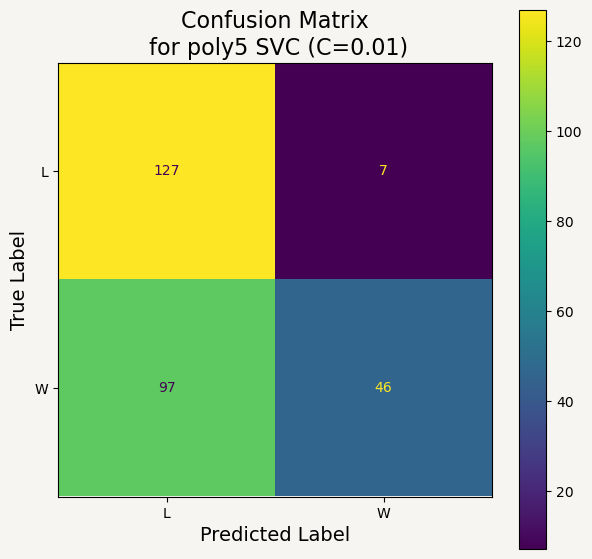

c: 0.01
Accuracy is: 0.625
Error rate is 0.375


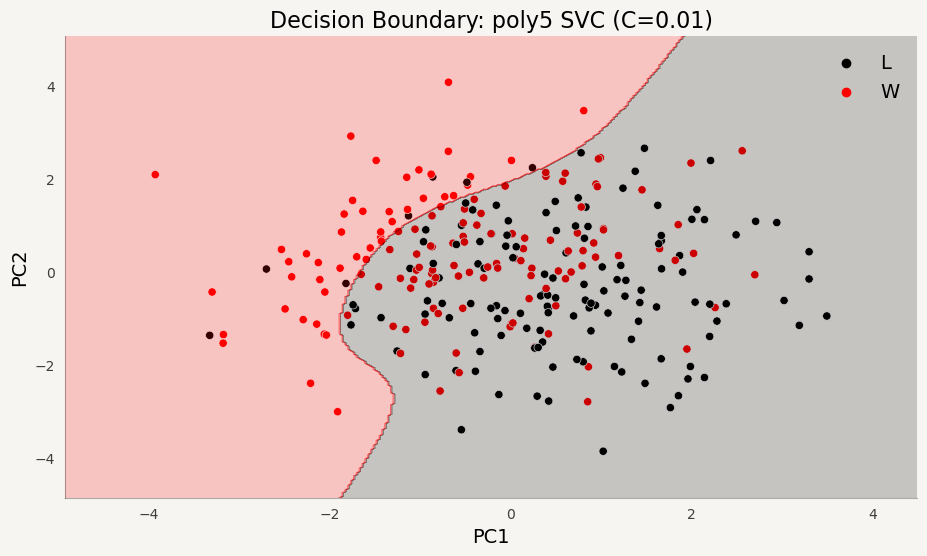

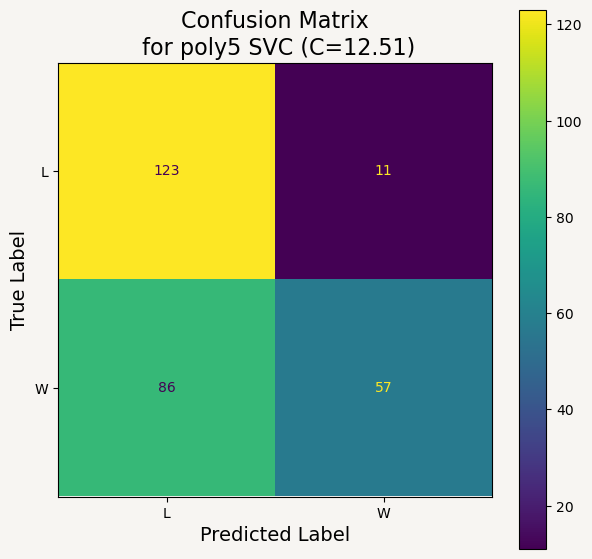

c: 12.51
Accuracy is: 0.650
Error rate is 0.350


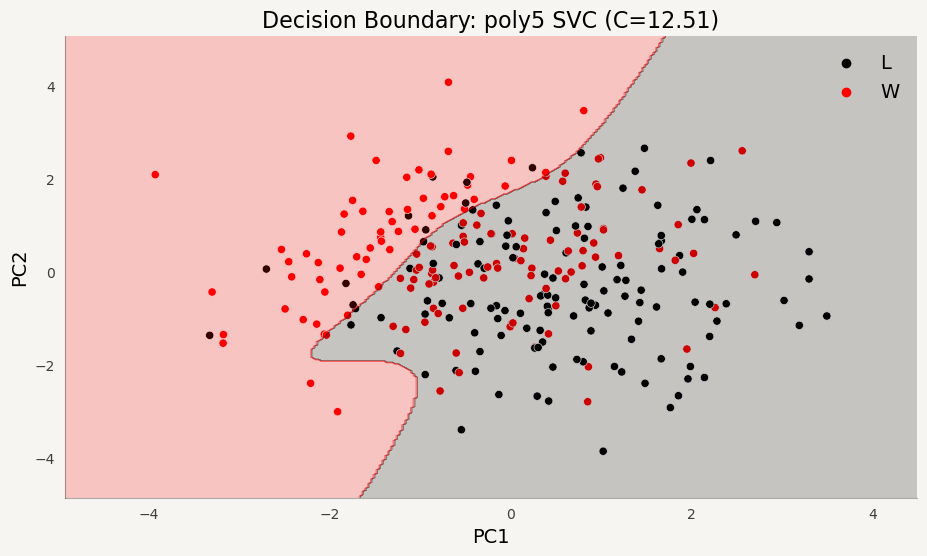

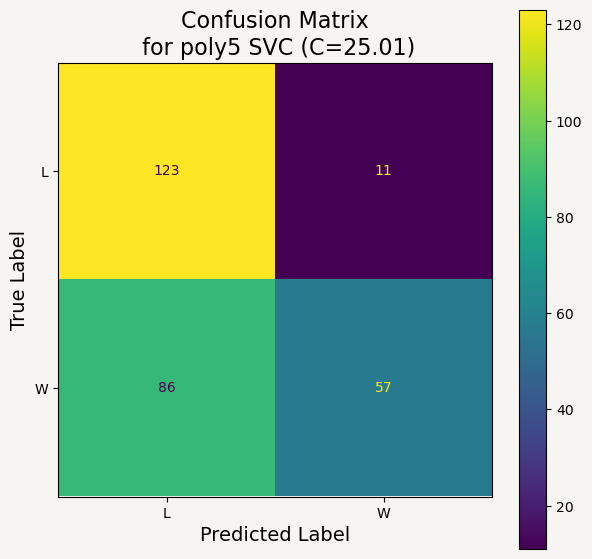

c: 25.01
Accuracy is: 0.650
Error rate is 0.350


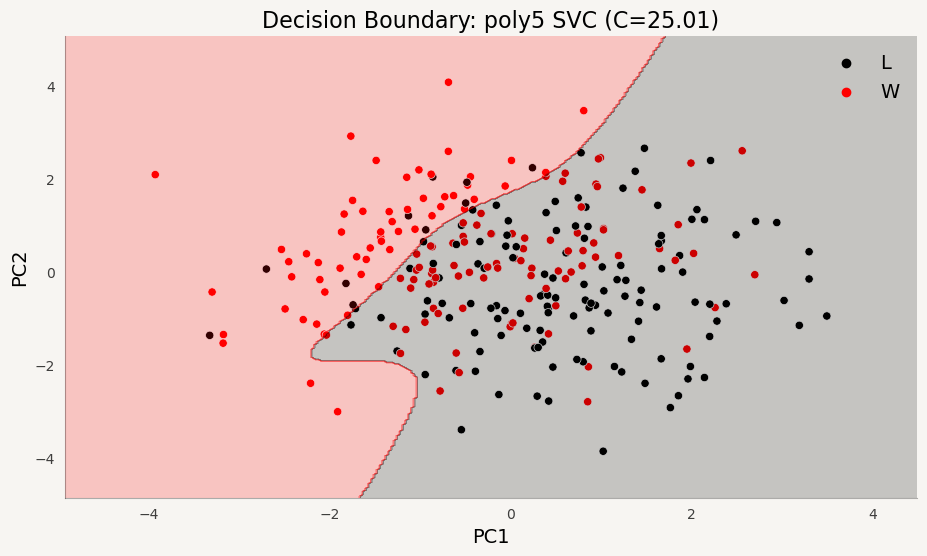

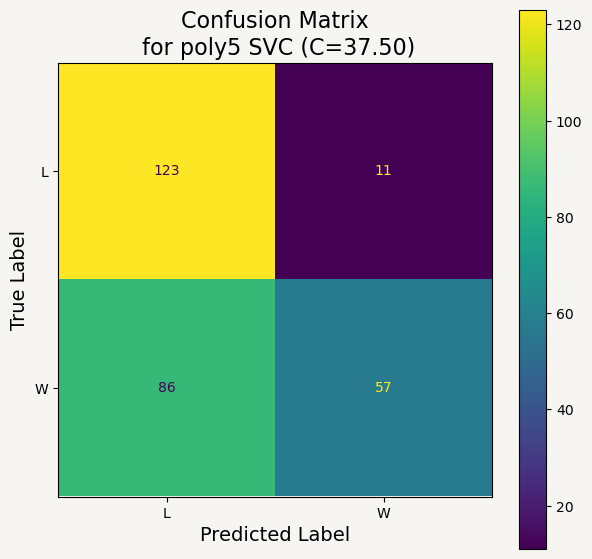

c: 37.50
Accuracy is: 0.650
Error rate is 0.350


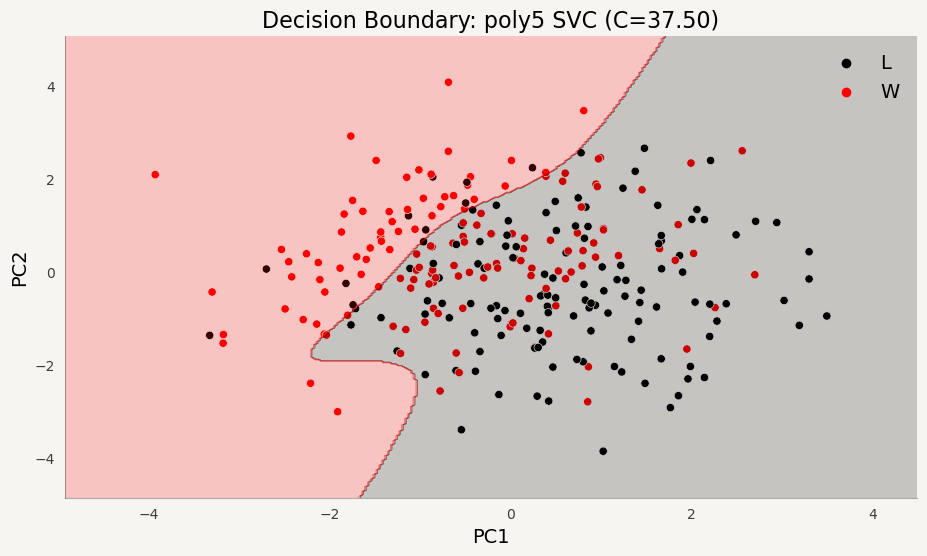

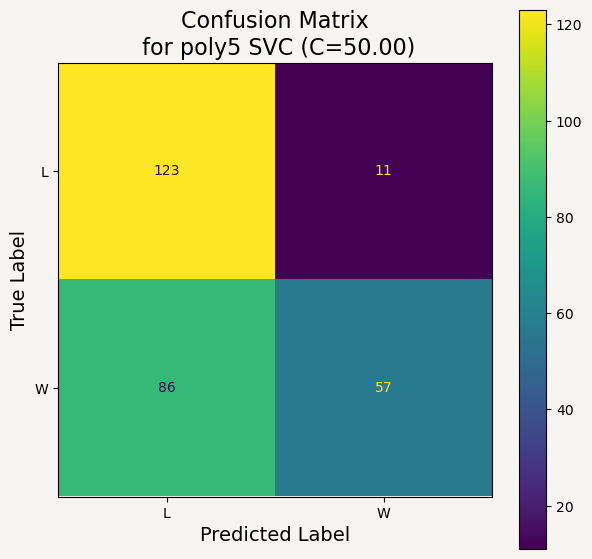

c: 50.00
Accuracy is: 0.650
Error rate is 0.350


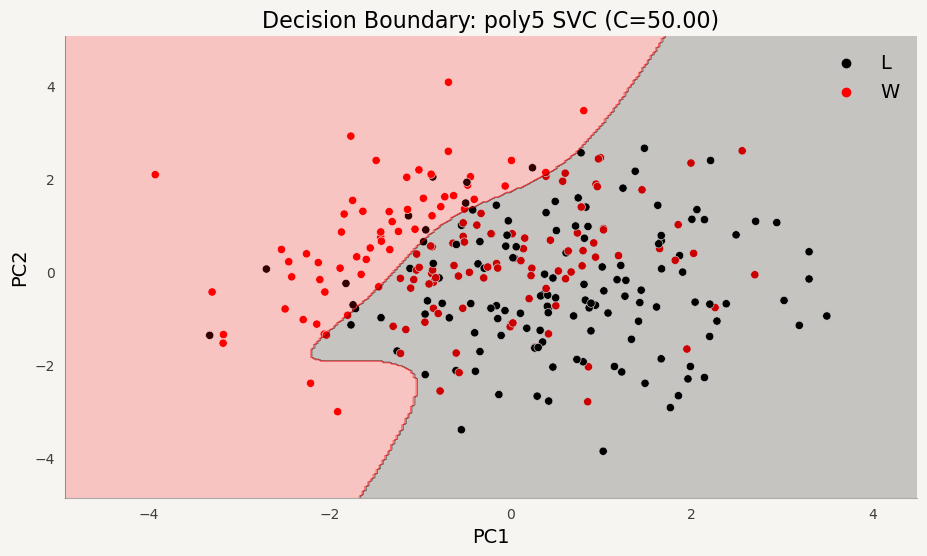

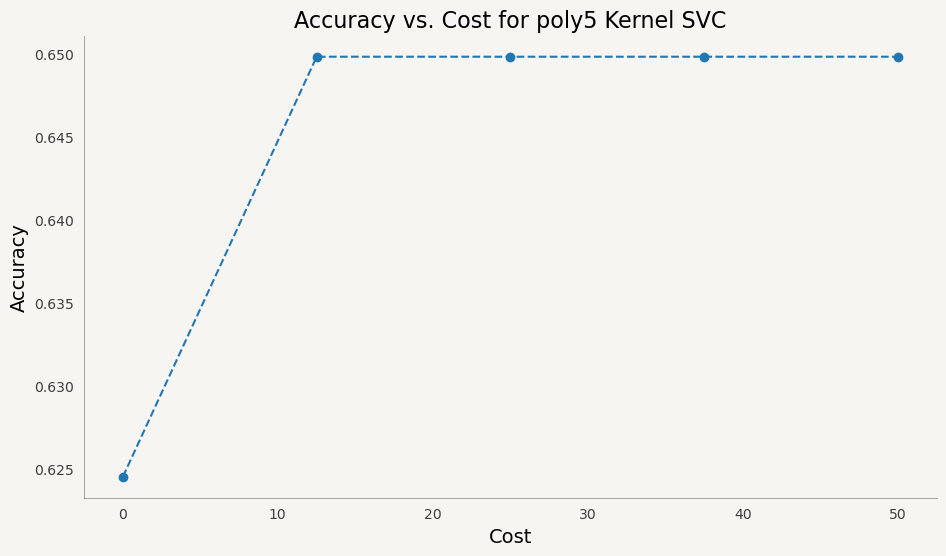

In [100]:
svm_config = {
    "model1": {"kernel": "rbf", "degree": 0},       # degree ignored by rbf
    "model2": {"kernel": "poly", "degree": 3},
    "model3": {"kernel": "poly", "degree": 5}
}

cVals = np.linspace(0.01, 50, 5)
model_results = []
for mod in svm_config.keys():
    kernel = svm_config[mod]["kernel"]
    degree = svm_config[mod]["degree"]
    accuracies = []

    for c in cVals:
        clf = make_pipeline(StandardScaler(), SVC(C=c, kernel=kernel, degree=degree))
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        err = 1 - acc
        accuracies.append(acc)

        # Record for summary bar chart
        model_label = f"{kernel}{degree} (C={c:.2f})"
        model_results.append((model_label, acc))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        fig_cm, ax_cm = plt.subplots(figsize=matrixsize)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
        disp.plot(ax=ax_cm)
        ax_cm.set_xlabel("Predicted Label", fontsize=labelsize)
        ax_cm.set_ylabel("True Label", fontsize=labelsize)
        ax_cm.set_title(f"Confusion Matrix\n for {kernel}{degree} SVC (C={c:.2f})", fontsize=titlesize)
        fig_cm.set_facecolor(facecolor)
        ax_cm.set_facecolor(facecolor)
        plt.savefig(f"../images/module4_images/confusion_matrix_{kernel}_{degree}_{round(c):03d}.png")
        plt.show()

        print(f"c: {c:.2f}")
        print(f"Accuracy is: {acc:.3f}")
        print(f"Error rate is {err:.3f}")

        # Decision boundary plot
        fig, ax = plt.subplots(figsize=figsize)
        sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test,
                        palette={'W': 'red', 'L': 'black'}, ax=ax)

        x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
        y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                             np.linspace(y_min, y_max, 300))
        grid = np.c_[xx.ravel(), yy.ravel()]
        Z = clf.predict(grid)
        Z = np.where(Z == 'W', 1, 0)
        Z = Z.reshape(xx.shape)

        custom_cmap = ListedColormap(['black', 'red'])
        ax.contourf(xx, yy, Z, alpha=0.2, cmap=custom_cmap)
        ax.set_title(f"Decision Boundary: {kernel}{degree} SVC (C={c:.2f})", fontsize=titlesize)
        ax.set_xlabel("PC1", fontsize=labelsize)
        ax.set_ylabel("PC2", fontsize=labelsize)
        tidy_axes(ax)
        fig.set_facecolor(facecolor)
        ax.set_facecolor(facecolor)
        plt.savefig(f"../images/module4_images/decision_boundary_{kernel}_{degree}_{round(c):03d}.png")
        plt.show()

    # Accuracy vs. Cost plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(cVals, accuracies, 'o--')
    ax.set_xlabel("Cost", fontsize=labelsize)
    ax.set_ylabel("Accuracy", fontsize=labelsize)
    ax.set_title(f"Accuracy vs. Cost for {kernel}{degree} Kernel SVC", fontsize=titlesize)
    tidy_axes(ax)
    fig.set_facecolor(facecolor)
    ax.set_facecolor(facecolor)
    plt.savefig(f"../images/module4_images/acc_vs_cost_{kernel}_{degree}.png")
    plt.show()


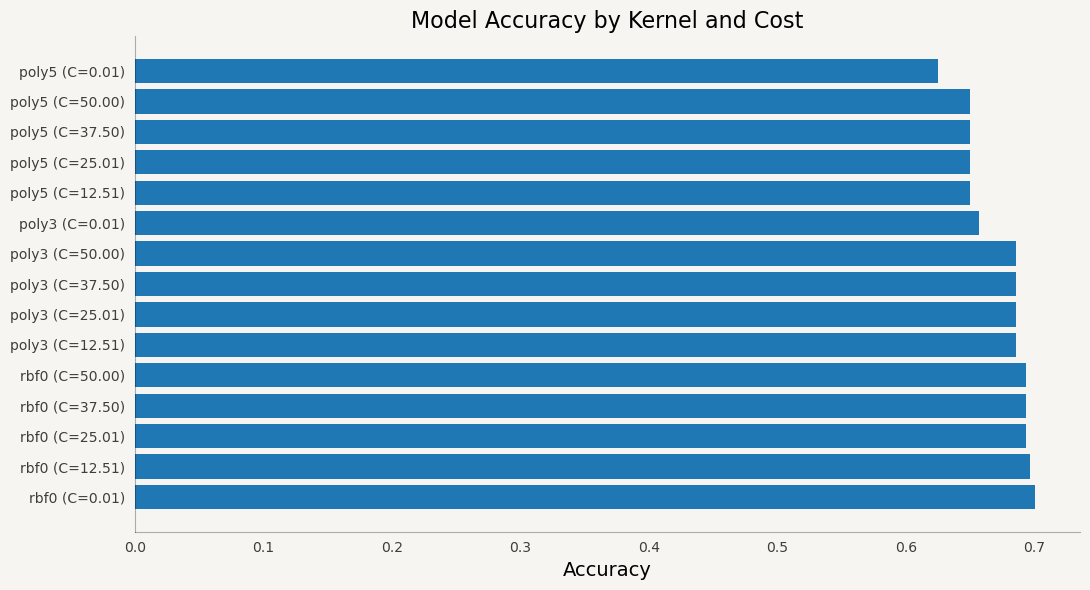

In [24]:
# Bar chart of model accuracies
fig, ax = plt.subplots(figsize=figsize)

# Sort by accuracy if desired
model_results_sorted = sorted(model_results, key=lambda x: x[1], reverse=True)
labels, values = zip(*model_results_sorted)

ax.barh(labels, values)
ax.set_xlabel("Accuracy", fontsize=labelsize)
ax.set_title("Model Accuracy by Kernel and Cost", fontsize=titlesize)
tidy_axes(ax)
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)
plt.tight_layout()
plt.savefig("../images/module4_images/model_accuracy_summary.png")
plt.show()


## Random forest

In [28]:
# Break dataframe into data and labels. Drop the game ID.
data = df[[col for col in df.keys() if "DIFF" in col]] #df.drop(columns=["TEAM_NAME", "GAME_ID", "WL"])
labels = df["WL"]
data.head(3)

,FIELD_GOAL_MADE_DIFF,FIELD_GOAL_MISSED_DIFF,FREE_THROW_DIFF,REBOUND_DIFF,TURNOVER_DIFF,FOUL_DIFF
0,-4,17,-9,-9,-5,8
1,4,-17,9,9,5,-8
2,-2,3,-5,0,0,9


In [29]:
# Encode target W/L to numeric as 1 and 0
le = LabelEncoder()
y_encoded = le.fit_transform(labels) 

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Initialize and train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Confusion Matrix:
[[102  37]
 [ 42  96]]

Classification Report:
              precision    recall  f1-score   support

           L       0.71      0.73      0.72       139
           W       0.72      0.70      0.71       138

    accuracy                           0.71       277
   macro avg       0.72      0.71      0.71       277
weighted avg       0.72      0.71      0.71       277



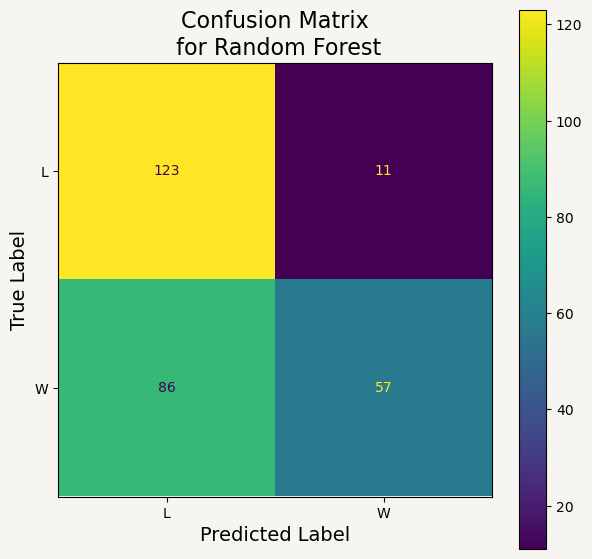

In [101]:
cm = confusion_matrix(y_test, y_pred)
fig_cm, ax_cm = plt.subplots(figsize=matrixsize)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(ax=ax_cm)
ax_cm.set_xlabel("Predicted Label", fontsize=labelsize)
ax_cm.set_ylabel("True Label", fontsize=labelsize)
ax_cm.set_title(f"Confusion Matrix\n for Random Forest", fontsize=titlesize)
fig_cm.set_facecolor(facecolor)
ax_cm.set_facecolor(facecolor)
plt.savefig(f"../images/module4_images/confusion_matrix_random_forest.png")
plt.show()

In [33]:
X_train.head()

,FIELD_GOAL_MADE_DIFF,FIELD_GOAL_MISSED_DIFF,FREE_THROW_DIFF,REBOUND_DIFF,TURNOVER_DIFF,FOUL_DIFF
841,5,-8,1,19,6,-3
831,3,2,-9,7,1,4
631,0,5,4,11,1,-5
1372,-3,4,3,-3,-1,-4
495,0,-8,-4,-2,6,-1


In [34]:
X_test.head()

,FIELD_GOAL_MADE_DIFF,FIELD_GOAL_MISSED_DIFF,FREE_THROW_DIFF,REBOUND_DIFF,TURNOVER_DIFF,FOUL_DIFF
1269,-2,3,4,-3,-4,-3
539,4,4,-1,-2,-5,0
732,0,-1,-6,0,1,6
307,2,8,5,0,-8,-4
409,-1,-8,12,1,-1,-3


## For background on SVMs

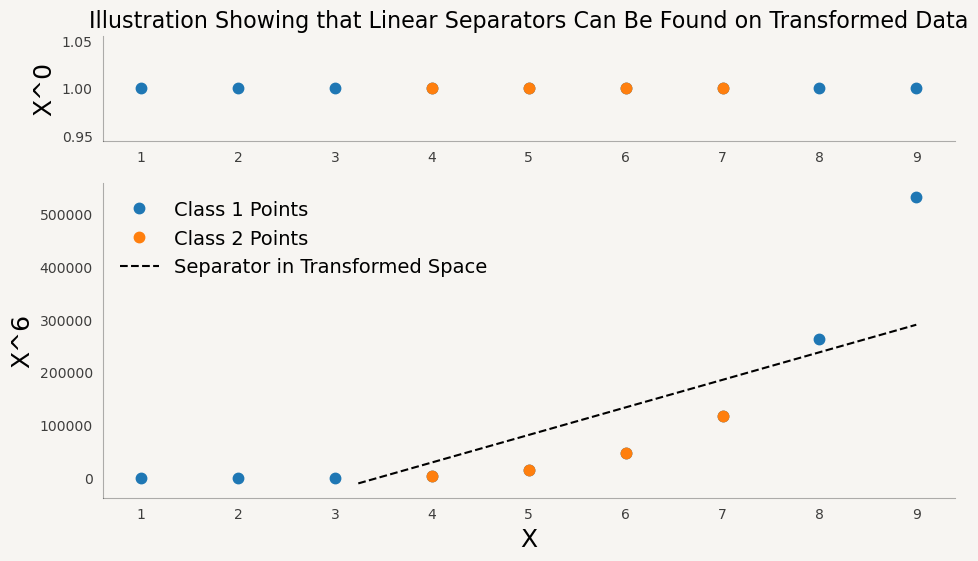

In [89]:
fig, (ax1, ax2) = plt.subplots(2,1, height_ratios=[1,3], figsize=figsize)

x = np.arange(1, 10, 1)
mask = (x>3) & ( x < 8)
y1=x**6
y= np.ones(len(x))

# ax.plot(x, y, '.', markersize=12,)
# ax.plot(x[mask], y[mask], 'r.', markersize=12)

ax2.plot(x, x**6, '.', markersize=15, label="Class 1 Points")
ax2.plot(x[mask],y1[mask], '.', markersize=15, label="Class 2 Points")

ax1.plot(x, np.ones(len(x)), '.', markersize=15)
ax1.plot(x[mask], np.ones(len(x[mask])), '.', markersize=15)

ax2.plot([3.24, 9], [-10000, 290000], 'k--', label="Separator in Transformed Space")


ax1.set_title("Illustration Showing that Linear Separators Can Be Found on Transformed Data", fontsize=titlesize)
ax2.set_xlabel("X", fontsize=18)
ax2.set_ylabel("X^6", fontsize=18)
ax1.set_ylabel("X^0", fontsize=18)
fig.set_facecolor(facecolor)
ax1.set_facecolor(facecolor)
ax2.set_facecolor(facecolor)
ax2.legend()
tidy_axes(ax1)
tidy_axes(ax2)
plt.savefig("../images/module4_images/transformation_illustration.png")
plt.show()

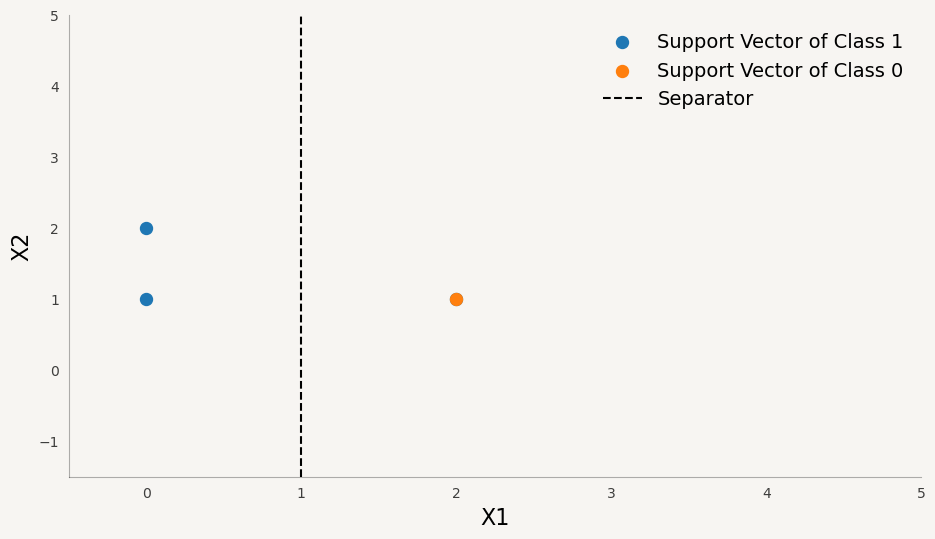

In [92]:
fig, ax = plt.subplots(figsize=figsize)


ax.scatter([0,0,2], [1,2,1], s=74, label="Support Vector of Class 1")
ax.scatter([2], [1], s=74, label="Support Vector of Class 0")

ax.set_xlim(-0.5, 5)
ax.set_ylim(-1.5, 5)
ax.axvline(1, color="black", linestyle="dashed", label="Separator")

tidy_axes(ax)
ax.set_xlabel("X1", fontsize=16)
ax.set_ylabel("X2", fontsize=16)
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)
plt.savefig("../images/module4_images/separator.png")
plt.show()